# Market segmentation example

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('3.12. Example.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyalty')

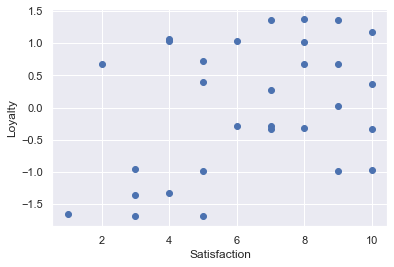

In [4]:
# Plot data for scatterplot
plt.scatter(data['Satisfaction'], data['Loyalty'])

# Title parameters X and Y
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [5]:
# Copy data into a new variable
x = data.copy()

## Clustering

In [6]:
# Produce clusters

# KMeans(number of cluster would like to produce)
kmeans = KMeans(2)

kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering Result

In [7]:
# Duplicate x into a new variable
clusters = x.copy()

# Assign new data to the dataframe
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

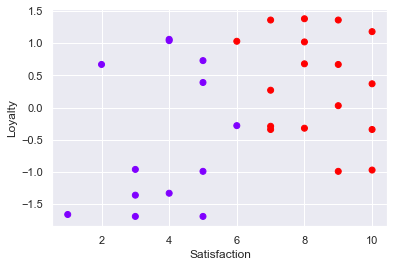

In [8]:
# Plot data for scatterplot
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'],cmap='rainbow')

# Title parameters X and Y
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standarize the variables

In [9]:
from sklearn import preprocessing

# sklearn.preprocesing.scale(x) scales(stadarizes with the mean 0, 
# and standard deviation of 1 by defaylt) each variable (column) separately

x_scaled = preprocessing.scale(x)

x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [10]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\serch\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.326631124753926,
 4.358871893303257,
 3.7282834443589534]

Text(0, 0.5, 'WCSS')

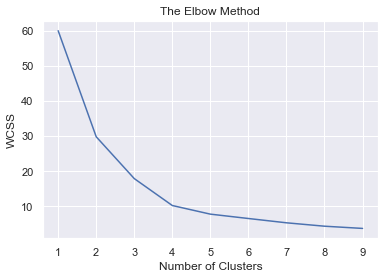

In [11]:
# Elbow Chart
plt.plot(range(1,10), wcss)

# Title
plt.title('The Elbow Method')

# Title parameters X and Y
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## Explre clustering solutions and select the number of clusters

In [12]:
# New mean clsuter
kmeans_new = KMeans(5)

# Fit the new data
kmeans_new.fit(x_scaled)

# Create a new cluster data frame
clusters_new = x.copy()

# Will contain the predicted cluster from the new clustering solution with the scaled
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [13]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,4
2,5,-0.99,1
3,7,-0.29,4
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,4
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

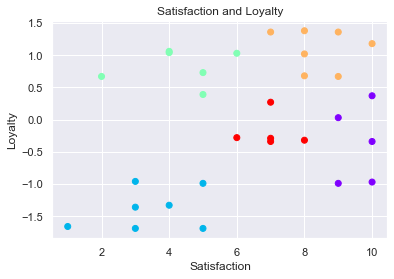

In [14]:
# Plot data for scatterplot
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'],cmap='rainbow')

# Title
plt.title('Satisfaction and Loyalty')

# Title parameters X and Y
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')